# RENASSIANCE Generated Parameter Analysis

In [68]:
#Parse arguments from configfile
from configparser import ConfigParser
configs = ConfigParser()
configs.read('configfile.ini')

base = configs['PATHS']['base']
output_path = configs['PATHS']['output_path']
met_model = configs['PATHS']['met_model']
model_file = configs['PATHS']['model_file']
thermo_experiment_file = configs['PATHS']['thermo_experiment_file']
regulation_file = configs['PATHS']['regulation_file']
kinetic_params_file = configs['PATHS']['kinetic_params_file']
steady_states_file = configs['PATHS']['steady_states_file']

path_to_kmodel = f'{base}/{met_model}/kinetic/{model_file}'
path_to_tmodel = f'{base}/{met_model}/thermo/{thermo_experiment_file}'
path_to_parameters = f'{base}/{met_model}/parameters/{kinetic_params_file}'
path_to_regulation = f'{base}/{met_model}/{regulation_file}'
path_to_samples = f'{base}/{met_model}/steady_state_samples/{steady_states_file}'

In [69]:
import pandas as pd

# Read the CSV file back into a DataFrame
df = pd.read_csv('gen_parms.csv')

# Extract k_names from the DataFrame columns
k_names = df.columns.tolist()

# Convert the DataFrame to a numpy array for gen_flat
gen_params = df.values


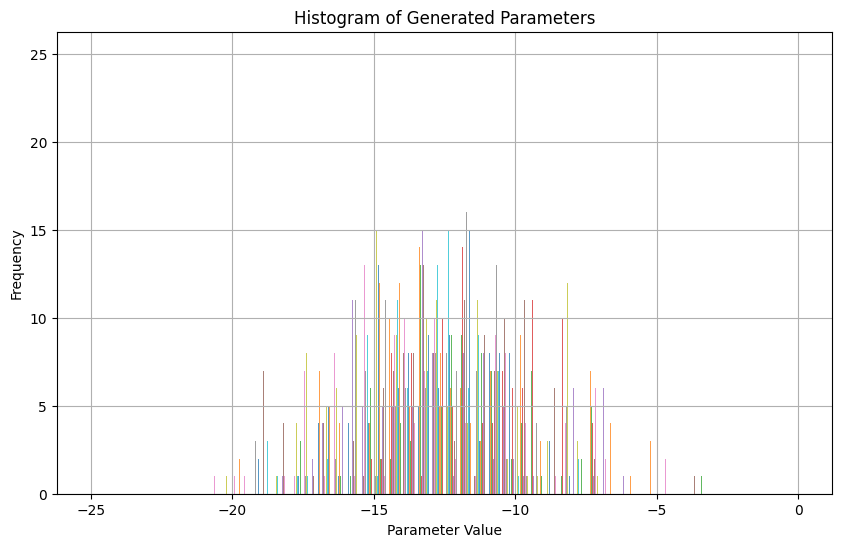

In [70]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(gen_params, bins=50, alpha=0.75)
plt.title('Histogram of Generated Parameters')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [17]:
import numpy as np
# Sort parameter names and corresponding values
sorted_indices = np.argsort(k_names)
sorted_parameter_names = np.array(k_names)[sorted_indices]
set_0 = gen_params[0]
sorted_matrix = set_0[sorted_indices]

filtered_indices = [i for i, name in enumerate(sorted_parameter_names) if "activation" in name or "inhibition" in name or "km_" in name]

# Extract the selected parameter names and their values from parameter_set_0
selected_parameter_names = sorted_parameter_names[filtered_indices]
gen_selected_values = sorted_matrix[filtered_indices]

In [20]:
print(len(selected_parameter_names), selected_parameter_names)
print(len(gen_selected_values), gen_selected_values)

380 ['k_activation_AM__3pg_c_PGK' 'k_activation_AM_accoa_c_PPC'
 'k_activation_AM_amp_c_GLUDy' 'k_activation_AM_atp_c_GLUDy'
 'k_activation_AM_atp_c_PGK' 'k_activation_AM_cit_c_FBA'
 'k_activation_AM_fdp_c_PPC' 'k_activation_AM_nad_c_ACALD'
 'k_activation_AM_pep_c_FBA' 'k_activation_AM_pep_c_FBP'
 'k_inhibition_IM__6pgc_c_PGI' 'k_inhibition_IM_adp_c_FBP'
 'k_inhibition_IM_amp_c_FBP' 'k_inhibition_IM_amp_c_RPI'
 'k_inhibition_IM_atp_c_LDH_D' 'k_inhibition_IM_dhap_c_FBA'
 'k_inhibition_IM_fdp_c_GND' 'k_inhibition_IM_icit_c_ICL'
 'k_inhibition_IM_nadph_c_G6PDH2r' 'k_inhibition_IM_pep_c_ICDHyr'
 'k_inhibition_IM_phe_L_c_DDPA' 'k_inhibition_IM_ru5p_D_c_GND'
 'km_product1_ACALD' 'km_product1_ADK1' 'km_product1_AKGDH'
 'km_product1_ALCD2x' 'km_product1_ANS' 'km_product1_CHORM'
 'km_product1_CHORS' 'km_product1_COLIPAabctex' 'km_product1_CS'
 'km_product1_DDPA' 'km_product1_DHQS' 'km_product1_DHQTi'
 'km_product1_FBA' 'km_product1_FBA3' 'km_product1_FBP' 'km_product1_FUM'
 'km_product1_G6PDH2r

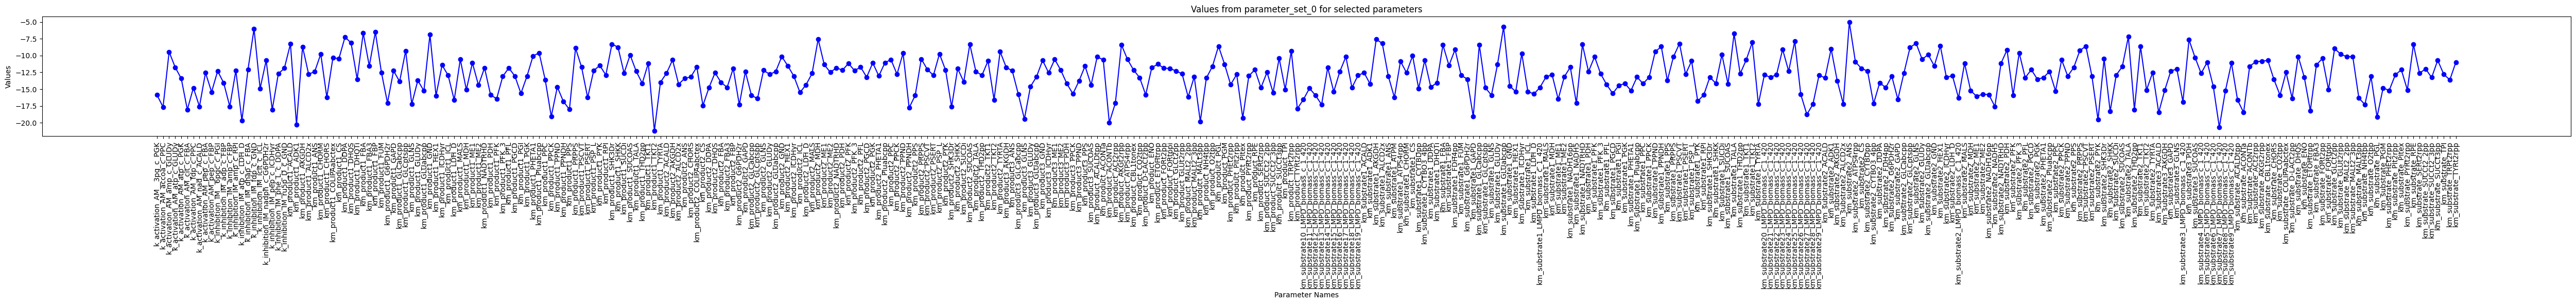

In [5]:
# Plotting the selected parameters and their values
plt.figure(figsize=(50, 6))
plt.plot(selected_parameter_names, gen_selected_values, marker='o', linestyle='-', color='b')
plt.title('Values from parameter_set_0 for selected parameters')
plt.xlabel('Parameter Names')
plt.ylabel('Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

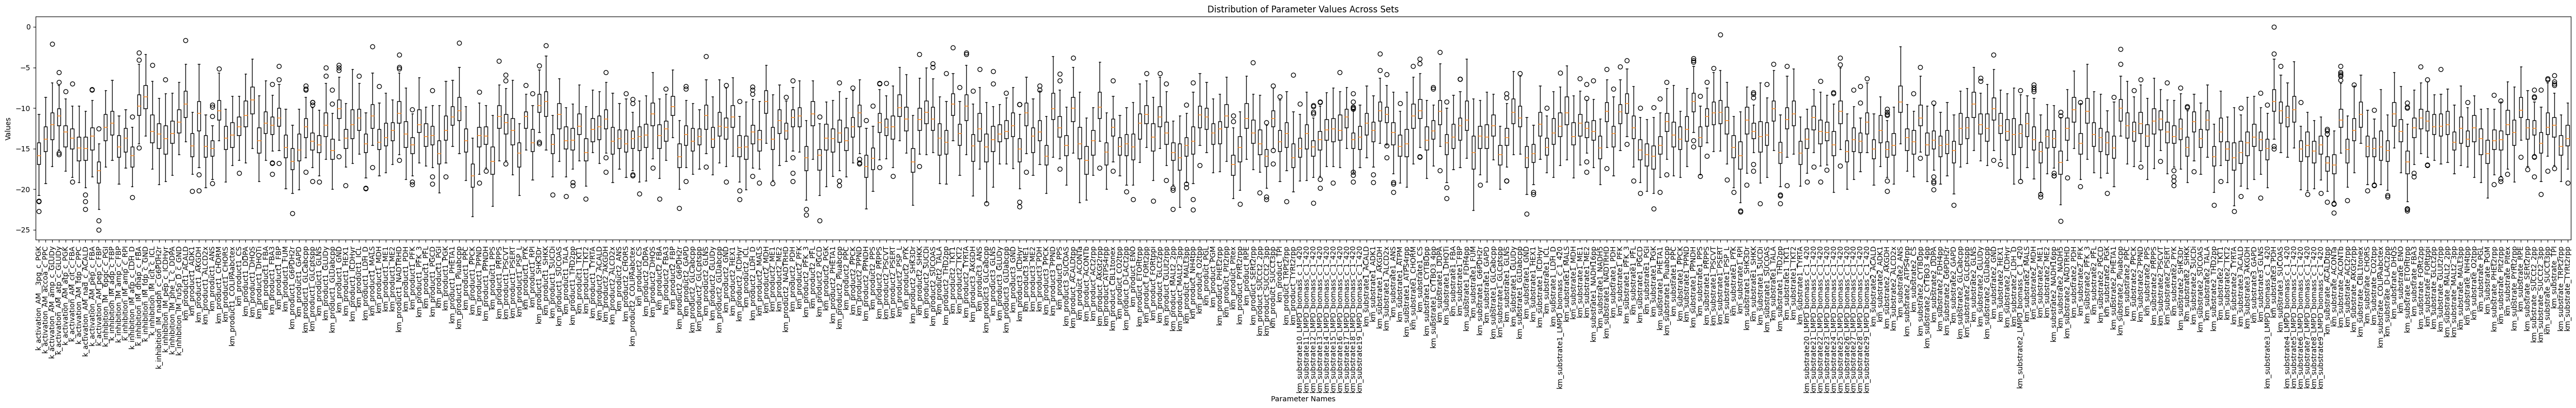

In [9]:
# Initialize a figure
plt.figure(figsize=(50, 8))

# Create a dataset for boxplot where each row corresponds to a parameter, and each column corresponds to a different set
data_for_boxplot = [np.array(gen_params)[:, sorted_indices[i]] for i in filtered_indices]

# Create the boxplot
plt.boxplot(data_for_boxplot, labels=selected_parameter_names)

# Add plot details
plt.xticks(rotation=90)
plt.xlabel('Parameter Names')
plt.ylabel('Values')
plt.title('Distribution of Parameter Values Across Sets')
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.savefig('all_parameter_sets')

In [56]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load HDF5 file
with h5py.File(path_to_parameters, 'r') as file:
    parameter_names_nomad = file['parameter_names'][:]
    num_sets_nomad = int(file['num_parameters_sets'][()])
    parameter_sets_nomad = [file[f'parameter_set_{i}'][:] for i in range(num_sets_nomad)]

In [57]:
# Convert parameter names to a list of strings if necessary
parameter_names_nomad = [name.decode() if isinstance(name, bytes) else name for name in parameter_names_nomad]

# Sort parameter names and corresponding values
sorted_indices_nomad = np.argsort(parameter_names_nomad)
sorted_parameter_names_nomad  = np.array(parameter_names_nomad)[sorted_indices_nomad]

# Create a sorted matrix
sorted_matrix_nomad  = np.array(parameter_sets_nomad)[:, sorted_indices_nomad].T

filtered_indices_nomad = [i for i, name in enumerate(sorted_parameter_names_nomad) if "activation" in name or "inhibition" in name or "km_" in name]
# Extract the selected parameter names and their values from parameter_set_0
selected_parameter_names_nomad  = sorted_parameter_names_nomad[filtered_indices_nomad]
selected_values_nomad  = np.log(sorted_matrix_nomad[filtered_indices_nomad] / 1e9)

In [58]:
print(len(selected_parameter_names_nomad), selected_parameter_names_nomad)
print(len(selected_values_nomad), selected_values_nomad)

406 ['k_activation_AM__3pg_c_PGK' 'k_activation_AM_accoa_c_PPC'
 'k_activation_AM_amp_c_GLUDy' 'k_activation_AM_atp_c_GLUDy'
 'k_activation_AM_atp_c_PGK' 'k_activation_AM_cit_c_FBA'
 'k_activation_AM_fdp_c_PPC' 'k_activation_AM_nad_c_ACALD'
 'k_activation_AM_pep_c_FBA' 'k_activation_AM_pep_c_FBP'
 'k_inhibition_IM__6pgc_c_PGI' 'k_inhibition_IM_adp_c_FBP'
 'k_inhibition_IM_amp_c_FBP' 'k_inhibition_IM_amp_c_RPI'
 'k_inhibition_IM_atp_c_LDH_D' 'k_inhibition_IM_dhap_c_FBA'
 'k_inhibition_IM_fdp_c_GND' 'k_inhibition_IM_icit_c_ICL'
 'k_inhibition_IM_nadph_c_G6PDH2r' 'k_inhibition_IM_pep_c_ICDHyr'
 'k_inhibition_IM_phe_L_c_DDPA' 'k_inhibition_IM_ru5p_D_c_GND'
 'km_product10_LMPD_biomass_c_1_420' 'km_product11_LMPD_biomass_c_1_420'
 'km_product12_LMPD_biomass_c_1_420' 'km_product13_LMPD_biomass_c_1_420'
 'km_product14_LMPD_biomass_c_1_420' 'km_product15_LMPD_biomass_c_1_420'
 'km_product16_LMPD_biomass_c_1_420' 'km_product1_ACALD'
 'km_product1_ADK1' 'km_product1_AKGDH' 'km_product1_ALCD2x'
 '

In [44]:
len(data_for_boxplot)

380

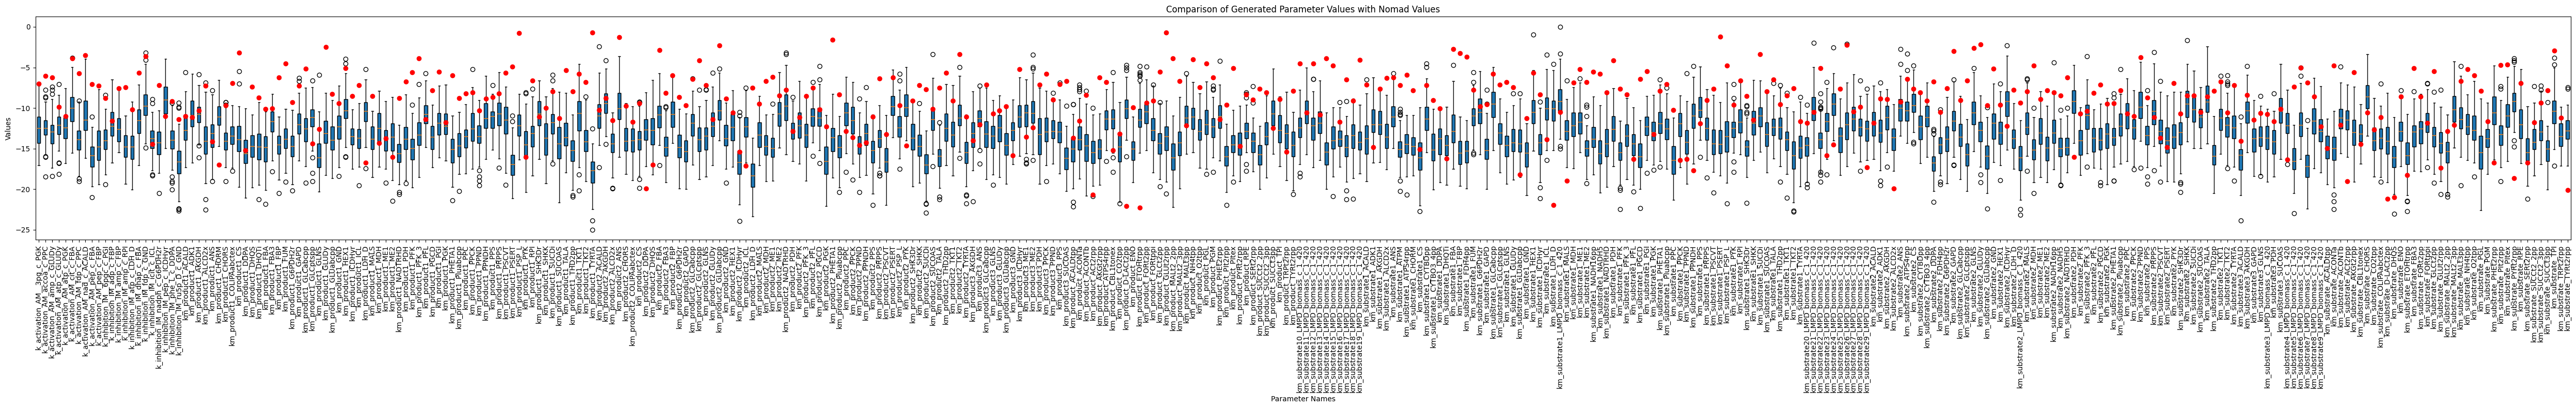

In [66]:
# Assuming data_for_boxplot is ready and selected_parameter_names contains the labels
# Ensure selected_values_nomad is a list or array of values corresponding to the selected_parameter_names

# Create the boxplot
plt.figure(figsize=(50, 8))
box = plt.boxplot(data_for_boxplot, labels=selected_parameter_names, patch_artist=True)

k=0
for i, param_name in enumerate(selected_parameter_names):
# Adding selected_values_nomad points in red to the boxplot
    for j, nomad_name in enumerate(selected_parameter_names_nomad):
        if param_name == nomad_name:
            plt.scatter(i + 1, selected_values_nomad[j][0], color='red', zorder=3)
            k+=1

plt.xticks(rotation=90)
plt.xlabel('Parameter Names')
plt.ylabel('Values')
plt.title('Comparison of Generated Parameter Values with Nomad Values')
plt.tight_layout()
plt.savefig('parameter_comparison.png')

In [60]:
common_params = set(selected_parameter_names).intersection(set(selected_parameter_names_nomad))
common_indices = [i for i, name in enumerate(selected_parameter_names) if name in common_params]
common_indices_nomad = [i for i, name in enumerate(selected_parameter_names_nomad) if name in common_params]

# Filter the values
common_gen_values = [gen_selected_values[i] for i in common_indices]
common_nomad_values = [selected_values_nomad[i][0] for i in common_indices_nomad]

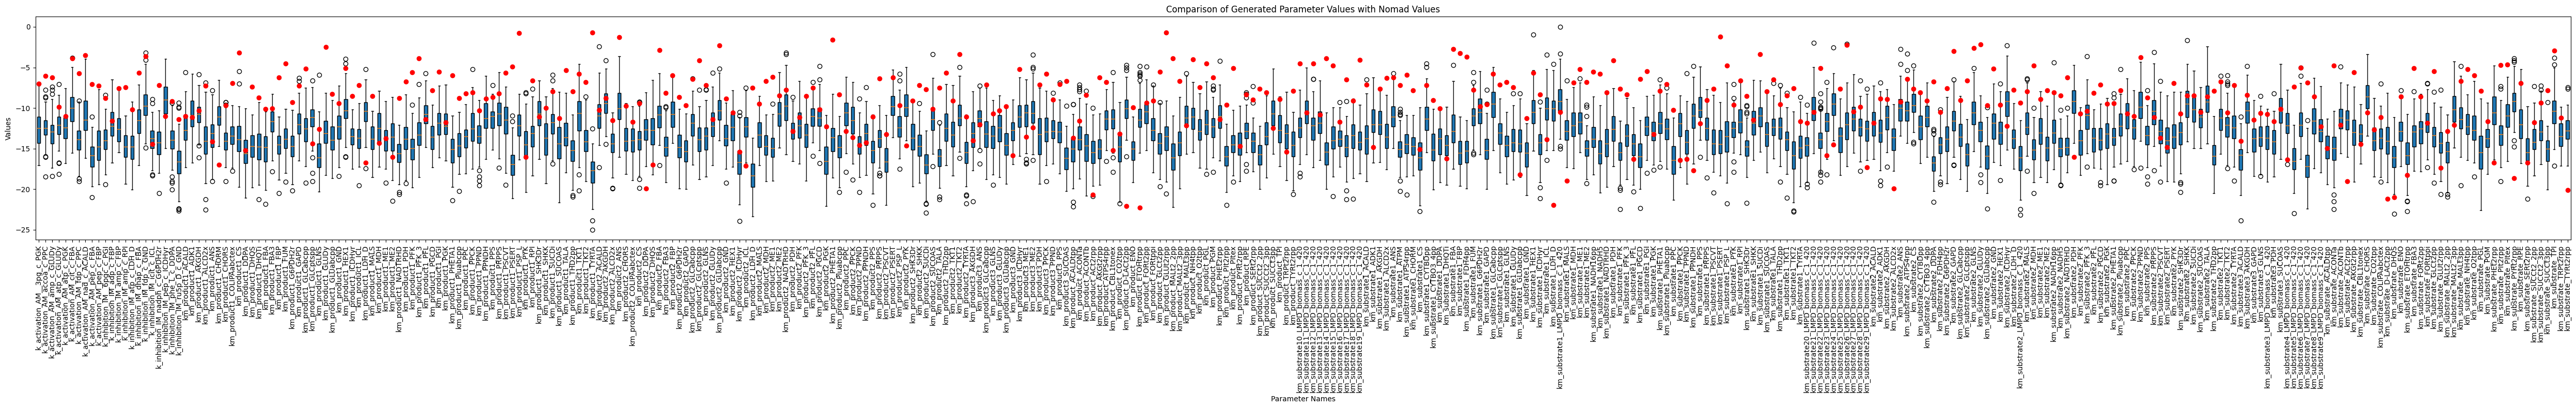

In [61]:
# Plotting
plt.figure(figsize=(50, 8))
box = plt.boxplot(data_for_boxplot, labels=np.array(selected_parameter_names)[common_indices], patch_artist=True)

# Adding points in red to the boxplot
for i, value in enumerate(common_nomad_values):
    plt.scatter(i + 1, value, color='red', zorder=3)

plt.xticks(rotation=90)
plt.xlabel('Parameter Names')
plt.ylabel('Values')
plt.title('Comparison of Generated Parameter Values with Nomad Values')
plt.tight_layout()
plt.savefig('parameter_comparison.png')
plt.show()